In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pickle.load(open("split0.pkl", "rb"))
X_tr = data["X_tr"]
X_te = data["X_te"]
y_tr = data["y_tr"]
y_te = data["y_te"]
print(X_tr.shape)

(1043640, 400)


In [3]:
dmax = np.max(np.abs(X_tr), axis=0)
X_trn = X_tr / dmax
X_ten = X_te / dmax
# alternatively standardize
# Xn = X_tr - X_tr.mean(axis=0)
# Xn = Xn / Xn.std(axis=0)

# multilinear kernel

$$k(x, x') = \prod_{m=1}^{M} \frac{\gamma_m^2+ x_m x'_m}{1 + \gamma_m^2}$$

In [4]:
def mlk(data: np.array, gamma: float):
    _, d = data.shape
    gamma_vec = np.ones((1, 1, d)) * gamma
    prod = np.einsum("nd, md -> nmd", data, data)
    frac = (gamma**2 + prod) / (1 + gamma**2)
    return frac.prod(-1)

def subsample(data, n):
    idx = np.random.randint(0,len(data), 128)
    return data[idx]

def plot(gamma):
    sub = subsample(X_trn, n=128)
    kernel = mlk(sub, gamma=gamma)

    show = kernel.copy()
    show -= show.min()
    show /= show.max()
    plt.imshow(show*255)    

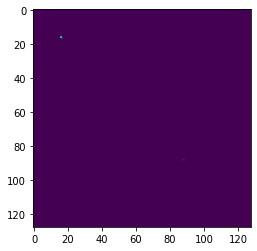

In [5]:
plot(gamma=1)

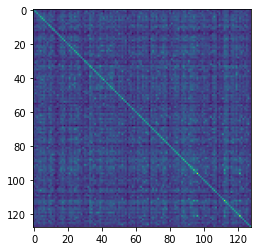

In [6]:
plot(gamma=1000)

# sample distribution kernel values

<AxesSubplot:ylabel='Density'>

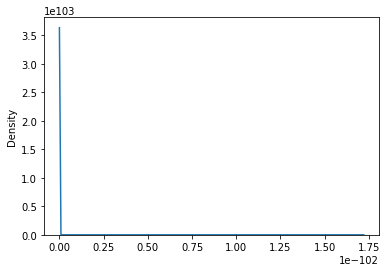

In [7]:
def kernel_samp(gamma):
    subs = subsample(X_trn, n=1024)
    return mlk(subs, gamma=gamma).flatten()

samp = np.concatenate([kernel_samp(gamma=1) for _ in range(100)])
sns.kdeplot(samp)

<AxesSubplot:ylabel='Density'>

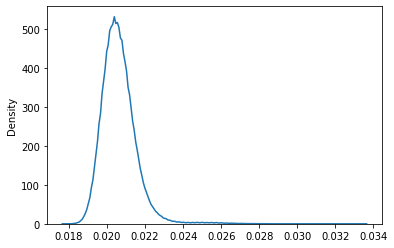

In [8]:
samp = np.concatenate([kernel_samp(gamma=10) for _ in range(100)])
sns.kdeplot(samp)

<AxesSubplot:ylabel='Density'>

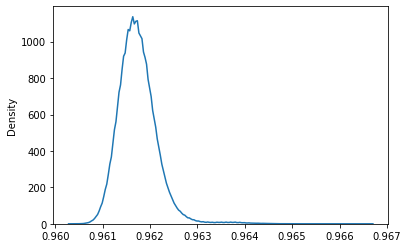

In [9]:
samp = np.concatenate([kernel_samp(gamma=100) for _ in range(100)])
sns.kdeplot(samp)

/Users/gabrieldernbach/git/venv/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

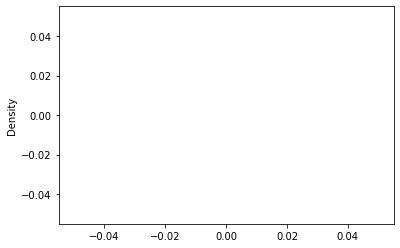

In [10]:
samp = np.concatenate([kernel_samp(gamma=0.1) for _ in range(100)])
sns.kdeplot(samp)